Cargo las librerías:

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime

# Preparación para los gráficos:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

# Fijo los valores por defecto de MatPlotLib:
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)

from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

import seaborn as sns
import sklearn as sk

Cargo los datos:

In [2]:
X_train = pd.read_csv('X_train_ns.csv')
del X_train['Unnamed: 0']
y_train = pd.read_csv('log_y_train.csv')
del y_train['Unnamed: 0']

Separo un conjunto de train y un conjunto de validación:

In [3]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,
                                                    test_size=0.15,random_state=1062022)# Uso el día como semilla

El objetivo es entrenar la red neuronal empleando el conjunto de train hasta que las predicciones sobre el conjunto de validación dejen de mejorar (debido a un sobreajuste), momento en el que se escojerán los pesos de la red neuronal que dieron lugar a las mejores predicciones sobre el conjunto de validación y se emplearán para la predicción.

Voy a entrenar la red neuronal empleando Stochastic Gradient Descent con Batches de tamaño 1323, más o menos un décimo del total de los datos.

La tasa de aprendizaje se seleccionará automáticamente, e irá cambiando a lo largo del entrenamiento.

Voy a emplear ReLU como función de activación.

La función de coste será el error cuadrático medio.

Los detalles están comentados en el siguiente código.

Empiezo probando una red neuronal sencilla, con una sóla capa oculta de 7 neuronas:

Epoch 1/100
9/9 [==============================] - 0s 16ms/step - loss: 15.1006 - mean_squared_error: 15.1006 - val_loss: 14.3566 - val_mean_squared_error: 14.3566
Epoch 2/100
9/9 [==============================] - 0s 4ms/step - loss: 14.0318 - mean_squared_error: 14.0318 - val_loss: 13.3521 - val_mean_squared_error: 13.3521
Epoch 3/100
9/9 [==============================] - 0s 4ms/step - loss: 13.0302 - mean_squared_error: 13.0302 - val_loss: 12.4099 - val_mean_squared_error: 12.4099
Epoch 4/100
9/9 [==============================] - 0s 4ms/step - loss: 12.0916 - mean_squared_error: 12.0916 - val_loss: 11.5266 - val_mean_squared_error: 11.5266
Epoch 5/100
9/9 [==============================] - 0s 4ms/step - loss: 11.2132 - mean_squared_error: 11.2132 - val_loss: 10.6949 - val_mean_squared_error: 10.6949
Epoch 6/100
9/9 [==============================] - 0s 4ms/step - loss: 10.3894 - mean_squared_error: 10.3893 - val_loss: 9.9135 - val_mean_squared_error: 9.9135
Epoch 7/100
9/9 [======

datetime.timedelta(seconds=5, microseconds=37949)

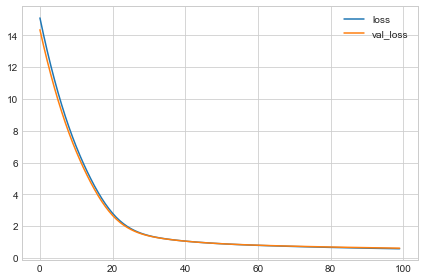

In [4]:
now1 = datetime.now()

# Defino la estructura de la red neuronal:

model = keras.Sequential([
    
    layers.Dense(7,activation="relu",input_shape=[50]),
    
    layers.Dense(1)
])

# Escojo la función de coste (error cuadrático medio, MeanSquaredError),
# también selecciono el algoritmo que seleccionará la tasa de aprendizaje (optimizer='adam').

model.compile(
    optimizer='adam',
    loss='MeanSquaredError',
    metrics=['MeanSquaredError'],
)

# La función parará si en 10 epochs la mejora del error cuadrático medio sobre validación
# es menor a 0.001:

early_stopping = keras.callbacks.EarlyStopping(
    patience=10,
    min_delta=0.001,
    restore_best_weights=True,
)

# Entrenaré la red con el conjunto de entrenamiento X_train que he seleccionado,
# pero comprobaré los errores sobre el conjunto de validación X_val para detectar sobreajustes.
# El máximo de epochs a entrenar es 100, a menos que se de el criterio de parada definido arriba.
# En el siguiente bloque de código también selecciono el tamaño de los batches
# para Stochastic Gradient Descent, que es de 100:

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    batch_size=1323,
    epochs=100,
    callbacks=[early_stopping],
)

# El siguiente código me permitirá emplear negrita al usar print:

class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

# Creo un gráfico del resultado del entrenamiento:    

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print(color.BOLD +
      "\nMínima suma de los cuadrados de los errores: {}".format(history_df['val_loss'].min())+
      color.END)

now2 = datetime.now()
now2-now1

En el gráfico anterior se pueden ver la disminución de la pérdida sobre los conjuntos de train (línea azul) y validación (línea naranja).

También aparece el error mínimo sobre validación, 0.68.

Es un error muy alto, probablemente hay un infraajuste, de forma que pruebo un modelo más complejo.

El código es el mismo que en el caso anterior, sólo cambia la estructura de la red neuronal, así que no esta comentado.

Esta vez pruebo una red de dos capas ocultas, con 14 y 4 neuronas respectivamente:

Epoch 1/100
9/9 [==============================] - 0s 12ms/step - loss: 18.8251 - mean_squared_error: 18.8251 - val_loss: 18.0299 - val_mean_squared_error: 18.0299
Epoch 2/100
9/9 [==============================] - 0s 4ms/step - loss: 17.5726 - mean_squared_error: 17.5726 - val_loss: 16.9530 - val_mean_squared_error: 16.9530
Epoch 3/100
9/9 [==============================] - 0s 4ms/step - loss: 16.5505 - mean_squared_error: 16.5505 - val_loss: 16.0565 - val_mean_squared_error: 16.0565
Epoch 4/100
9/9 [==============================] - 0s 4ms/step - loss: 15.6864 - mean_squared_error: 15.6864 - val_loss: 15.2743 - val_mean_squared_error: 15.2743
Epoch 5/100
9/9 [==============================] - 0s 4ms/step - loss: 14.9240 - mean_squared_error: 14.9240 - val_loss: 14.5631 - val_mean_squared_error: 14.5631
Epoch 6/100
9/9 [==============================] - 0s 5ms/step - loss: 14.2238 - mean_squared_error: 14.2238 - val_loss: 13.8931 - val_mean_squared_error: 13.8931
Epoch 7/100
9/9 [====

Epoch 52/100
9/9 [==============================] - 0s 4ms/step - loss: 0.5655 - mean_squared_error: 0.5655 - val_loss: 0.5787 - val_mean_squared_error: 0.5787
Epoch 53/100
9/9 [==============================] - 0s 4ms/step - loss: 0.5577 - mean_squared_error: 0.5577 - val_loss: 0.5711 - val_mean_squared_error: 0.5711
Epoch 54/100
9/9 [==============================] - 0s 3ms/step - loss: 0.5503 - mean_squared_error: 0.5503 - val_loss: 0.5639 - val_mean_squared_error: 0.5639
Epoch 55/100
9/9 [==============================] - 0s 4ms/step - loss: 0.5432 - mean_squared_error: 0.5432 - val_loss: 0.5570 - val_mean_squared_error: 0.5570
Epoch 56/100
9/9 [==============================] - 0s 4ms/step - loss: 0.5363 - mean_squared_error: 0.5363 - val_loss: 0.5510 - val_mean_squared_error: 0.5510
Epoch 57/100
9/9 [==============================] - 0s 4ms/step - loss: 0.5297 - mean_squared_error: 0.5297 - val_loss: 0.5456 - val_mean_squared_error: 0.5456
Epoch 58/100
9/9 [======================

datetime.timedelta(seconds=3, microseconds=919687)

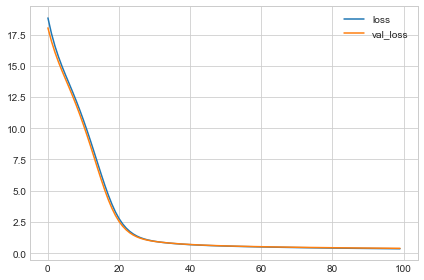

In [5]:
now1 = datetime.now()

model = keras.Sequential([
    
    layers.Dense(14,activation="relu",input_shape=[50]),
    
    layers.Dense(4,activation="relu"),
    
    layers.Dense(1)
])

model.compile(
    optimizer='adam',
    loss='MeanSquaredError',
    metrics=['MeanSquaredError'],
)

early_stopping = keras.callbacks.EarlyStopping(
    patience=10,
    min_delta=0.001,
    restore_best_weights=True,
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    batch_size=1323,
    epochs=100,
    callbacks=[early_stopping],
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print(color.BOLD +
      "\nMínima suma de los cuadrados de los errores: {}".format(history_df['val_loss'].min())+
      color.END)

now2 = datetime.now()
now2-now1

El error se reduce mucho. Definitivamente, el problema era de infraajuste.

Lo complico un poco más con dos capas de 16 y 4 neuronas.

Además, añado capas de Batch Normalization, que acelerán el entrenamiento.

Añado también una capa de Dropout. Estas capas reducen la probabilidad de cometer un error por sobreajuste.

Epoch 1/100
9/9 [==============================] - 0s 16ms/step - loss: 18.5305 - mean_squared_error: 18.5305 - val_loss: 27.7649 - val_mean_squared_error: 27.7649
Epoch 2/100
9/9 [==============================] - 0s 6ms/step - loss: 17.7319 - mean_squared_error: 17.7319 - val_loss: 26.1790 - val_mean_squared_error: 26.1790
Epoch 3/100
9/9 [==============================] - 0s 5ms/step - loss: 17.0730 - mean_squared_error: 17.0730 - val_loss: 24.8466 - val_mean_squared_error: 24.8466
Epoch 4/100
9/9 [==============================] - 0s 6ms/step - loss: 16.5132 - mean_squared_error: 16.5132 - val_loss: 23.5805 - val_mean_squared_error: 23.5805
Epoch 5/100
9/9 [==============================] - 0s 5ms/step - loss: 16.0869 - mean_squared_error: 16.0869 - val_loss: 22.4554 - val_mean_squared_error: 22.4554
Epoch 6/100
9/9 [==============================] - 0s 5ms/step - loss: 15.6541 - mean_squared_error: 15.6541 - val_loss: 21.4400 - val_mean_squared_error: 21.4400
Epoch 7/100
9/9 [====

Epoch 52/100
9/9 [==============================] - 0s 5ms/step - loss: 2.5975 - mean_squared_error: 2.5975 - val_loss: 2.5392 - val_mean_squared_error: 2.5392
Epoch 53/100
9/9 [==============================] - 0s 5ms/step - loss: 2.4334 - mean_squared_error: 2.4334 - val_loss: 2.3661 - val_mean_squared_error: 2.3661
Epoch 54/100
9/9 [==============================] - 0s 5ms/step - loss: 2.2760 - mean_squared_error: 2.2760 - val_loss: 2.2039 - val_mean_squared_error: 2.2039
Epoch 55/100
9/9 [==============================] - 0s 4ms/step - loss: 2.1232 - mean_squared_error: 2.1232 - val_loss: 2.0598 - val_mean_squared_error: 2.0598
Epoch 56/100
9/9 [==============================] - 0s 6ms/step - loss: 1.9836 - mean_squared_error: 1.9836 - val_loss: 1.9266 - val_mean_squared_error: 1.9266
Epoch 57/100
9/9 [==============================] - 0s 6ms/step - loss: 1.8461 - mean_squared_error: 1.8461 - val_loss: 1.7988 - val_mean_squared_error: 1.7988
Epoch 58/100
9/9 [======================

datetime.timedelta(seconds=5, microseconds=182288)

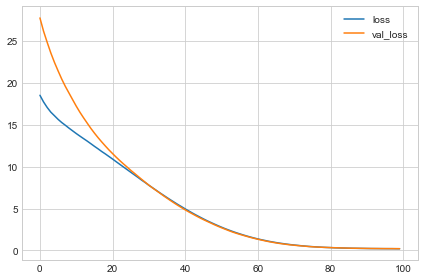

In [7]:
now1 = datetime.now()

model = keras.Sequential([
    
    layers.Dense(16,activation="relu",input_shape=[50]),
    layers.BatchNormalization(),
    layers.Dropout(3/16),
    
    
    layers.Dense(4,activation="relu"),
    layers.BatchNormalization(),
    
    layers.Dense(1)
])

model.compile(
    optimizer='adam',
    loss='MeanSquaredError',
    metrics=['MeanSquaredError'],
)

early_stopping = keras.callbacks.EarlyStopping(
    patience=10,
    min_delta=0.001,
    restore_best_weights=True,
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    batch_size=1323,
    epochs=100,
    callbacks=[early_stopping],
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print(color.BOLD +
      "\nMínima suma de los cuadrados de los errores: {}".format(history_df['val_loss'].min())+
      color.END)

now2 = datetime.now()
now2-now1

El modelo mejora mucho con el añadido de capas de BatchNormalization y de Dropout.

Voy a tratar hallar primero el mejor modelo de una capa, y después añadir una segunda capa.

Como añadir una capa incluye complejidad en el modelo, el modelo de dos capas requerirá menos neuronas en la primera capa que el de una sóla capa, de forma que el modelo de una capa me dará una idea sobre el número de neuronas máximo para la primera capa.

Pruebo primero con una capa de 50 neuronas:

Epoch 1/100
9/9 [==============================] - 0s 14ms/step - loss: 18.3385 - mean_squared_error: 18.3385 - val_loss: 11.2279 - val_mean_squared_error: 11.2279
Epoch 2/100
9/9 [==============================] - 0s 6ms/step - loss: 16.6437 - mean_squared_error: 16.6437 - val_loss: 10.8124 - val_mean_squared_error: 10.8124
Epoch 3/100
9/9 [==============================] - 0s 6ms/step - loss: 15.6836 - mean_squared_error: 15.6836 - val_loss: 10.4594 - val_mean_squared_error: 10.4594
Epoch 4/100
9/9 [==============================] - 0s 7ms/step - loss: 14.8657 - mean_squared_error: 14.8657 - val_loss: 10.1349 - val_mean_squared_error: 10.1349
Epoch 5/100
9/9 [==============================] - 0s 7ms/step - loss: 14.0823 - mean_squared_error: 14.0823 - val_loss: 9.7576 - val_mean_squared_error: 9.7576
Epoch 6/100
9/9 [==============================] - 0s 6ms/step - loss: 13.4461 - mean_squared_error: 13.4461 - val_loss: 9.2693 - val_mean_squared_error: 9.2693
Epoch 7/100
9/9 [========

9/9 [==============================] - 0s 4ms/step - loss: 0.8594 - mean_squared_error: 0.8594 - val_loss: 0.2653 - val_mean_squared_error: 0.2653
Epoch 53/100
9/9 [==============================] - 0s 5ms/step - loss: 0.8099 - mean_squared_error: 0.8099 - val_loss: 0.2530 - val_mean_squared_error: 0.2530
Epoch 54/100
9/9 [==============================] - 0s 4ms/step - loss: 0.7853 - mean_squared_error: 0.7853 - val_loss: 0.2424 - val_mean_squared_error: 0.2424
Epoch 55/100
9/9 [==============================] - 0s 5ms/step - loss: 0.7915 - mean_squared_error: 0.7915 - val_loss: 0.2352 - val_mean_squared_error: 0.2352
Epoch 56/100
9/9 [==============================] - 0s 6ms/step - loss: 0.7849 - mean_squared_error: 0.7849 - val_loss: 0.2404 - val_mean_squared_error: 0.2404
Epoch 57/100
9/9 [==============================] - 0s 5ms/step - loss: 0.7435 - mean_squared_error: 0.7435 - val_loss: 0.2436 - val_mean_squared_error: 0.2436
Epoch 58/100
9/9 [==============================] - 0

datetime.timedelta(seconds=5, microseconds=347325)

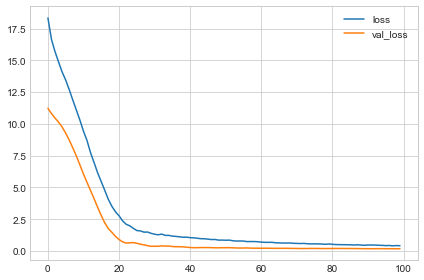

In [8]:
now1 = datetime.now()

model = keras.Sequential([
    
    layers.Dense(50,activation="relu",input_shape=[50]),
    layers.BatchNormalization(),
    layers.Dropout(5/25),
    
    
    #layers.Dense(4,activation="relu"),
    #layers.BatchNormalization(),
    
    layers.Dense(1)
])

model.compile(
    optimizer='adam',
    loss='MeanSquaredError',
    metrics=['MeanSquaredError'],
)

early_stopping = keras.callbacks.EarlyStopping(
    patience=10,
    min_delta=0.001,
    restore_best_weights=True,
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    batch_size=1323,
    epochs=100,
    callbacks=[early_stopping],
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print(color.BOLD +
      "\nMínima suma de los cuadrados de los errores: {}".format(history_df['val_loss'].min())+
      color.END)

now2 = datetime.now()
now2-now1

El motivo por el que el error de validación esta por debajo del error de train es por que la capa de Dropout sólo se activa durante el entrenamiento, no durante la predicción (empeorando el error sobre train, pero mejorando el error sobre validación al reducir el sobreajuste).

El modelo mejora.

Pruebo un modelo de una capa con 100 neuronas, esta vez sin BatchNormalization:

Epoch 1/100
9/9 [==============================] - 0s 13ms/step - loss: 12.0671 - mean_squared_error: 12.0671 - val_loss: 9.1665 - val_mean_squared_error: 9.1665
Epoch 2/100
9/9 [==============================] - 0s 6ms/step - loss: 7.4895 - mean_squared_error: 7.4895 - val_loss: 5.4246 - val_mean_squared_error: 5.4246
Epoch 3/100
9/9 [==============================] - 0s 6ms/step - loss: 4.4297 - mean_squared_error: 4.4297 - val_loss: 2.9928 - val_mean_squared_error: 2.9928
Epoch 4/100
9/9 [==============================] - 0s 7ms/step - loss: 2.5964 - mean_squared_error: 2.5964 - val_loss: 1.6560 - val_mean_squared_error: 1.6560
Epoch 5/100
9/9 [==============================] - 0s 6ms/step - loss: 1.5737 - mean_squared_error: 1.5737 - val_loss: 1.1004 - val_mean_squared_error: 1.1004
Epoch 6/100
9/9 [==============================] - 0s 6ms/step - loss: 1.3177 - mean_squared_error: 1.3177 - val_loss: 0.9129 - val_mean_squared_error: 0.9129
Epoch 7/100
9/9 [==========================

datetime.timedelta(seconds=2, microseconds=862910)

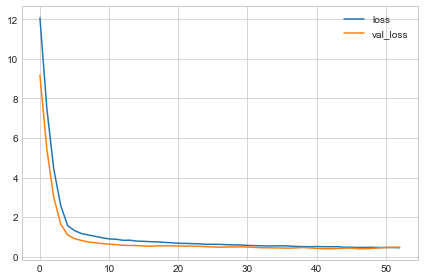

In [9]:
now1 = datetime.now()

model = keras.Sequential([
    
    layers.Dense(100,activation="relu",input_shape=[50]),
    #layers.BatchNormalization(),
    layers.Dropout(5/25),
    
    
    #layers.Dense(4,activation="relu"),
    #layers.BatchNormalization(),
    
    layers.Dense(1)
])

model.compile(
    optimizer='adam',
    loss='MeanSquaredError',
    metrics=['MeanSquaredError'],
)

early_stopping = keras.callbacks.EarlyStopping(
    patience=10,
    min_delta=0.001,
    restore_best_weights=True,
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    batch_size=1323,
    epochs=100,
    callbacks=[early_stopping],
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print(color.BOLD +
      "\nMínima suma de los cuadrados de los errores: {}".format(history_df['val_loss'].min())+
      color.END)

now2 = datetime.now()
now2-now1

El resultado es malo. Pruebo el mismo modelo, esta vez con BatchNormalization:

Epoch 1/100
9/9 [==============================] - 0s 14ms/step - loss: 17.7073 - mean_squared_error: 17.7073 - val_loss: 12.1303 - val_mean_squared_error: 12.1303
Epoch 2/100
9/9 [==============================] - 0s 7ms/step - loss: 16.0412 - mean_squared_error: 16.0412 - val_loss: 11.6819 - val_mean_squared_error: 11.6819
Epoch 3/100
9/9 [==============================] - 0s 7ms/step - loss: 15.1041 - mean_squared_error: 15.1041 - val_loss: 11.0350 - val_mean_squared_error: 11.0350
Epoch 4/100
9/9 [==============================] - 0s 6ms/step - loss: 14.1778 - mean_squared_error: 14.1778 - val_loss: 10.4077 - val_mean_squared_error: 10.4077
Epoch 5/100
9/9 [==============================] - 0s 6ms/step - loss: 13.3462 - mean_squared_error: 13.3462 - val_loss: 9.7580 - val_mean_squared_error: 9.7580
Epoch 6/100
9/9 [==============================] - 0s 5ms/step - loss: 12.3690 - mean_squared_error: 12.3690 - val_loss: 8.9882 - val_mean_squared_error: 8.9882
Epoch 7/100
9/9 [========

datetime.timedelta(seconds=5, microseconds=429110)

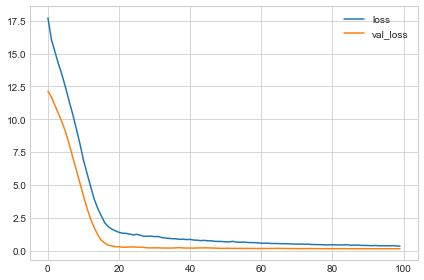

In [10]:
now1 = datetime.now()

model = keras.Sequential([
    
    layers.Dense(100,activation="relu",input_shape=[50]),
    layers.BatchNormalization(),
    layers.Dropout(5/25),
    
    
    #layers.Dense(4,activation="relu"),
    #layers.BatchNormalization(),
    
    layers.Dense(1)
])

model.compile(
    optimizer='adam',
    loss='MeanSquaredError',
    metrics=['MeanSquaredError'],
)

early_stopping = keras.callbacks.EarlyStopping(
    patience=10,
    min_delta=0.001,
    restore_best_weights=True,
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    batch_size=1323,
    epochs=100,
    callbacks=[early_stopping],
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print(color.BOLD +
      "\nMínima suma de los cuadrados de los errores: {}".format(history_df['val_loss'].min())+
      color.END)

now2 = datetime.now()
now2-now1

El resultado ha sido mucho mejor empleando BatchNormalization, de forma que lo emplearé en el futuro.

Como el modelo con 100 neuronas da mejor resultado que el de 50 neuronas, pruebo con 200 neuronas:

Epoch 1/100
9/9 [==============================] - 0s 19ms/step - loss: 17.0997 - mean_squared_error: 17.0997 - val_loss: 13.6270 - val_mean_squared_error: 13.6270
Epoch 2/100
9/9 [==============================] - 0s 11ms/step - loss: 15.2945 - mean_squared_error: 15.2945 - val_loss: 12.6357 - val_mean_squared_error: 12.6357
Epoch 3/100
9/9 [==============================] - 0s 9ms/step - loss: 14.0946 - mean_squared_error: 14.0946 - val_loss: 11.5783 - val_mean_squared_error: 11.5783
Epoch 4/100
9/9 [==============================] - 0s 9ms/step - loss: 12.7830 - mean_squared_error: 12.7830 - val_loss: 10.3755 - val_mean_squared_error: 10.3755
Epoch 5/100
9/9 [==============================] - 0s 9ms/step - loss: 11.5209 - mean_squared_error: 11.5209 - val_loss: 9.1005 - val_mean_squared_error: 9.1005
Epoch 6/100
9/9 [==============================] - 0s 9ms/step - loss: 10.0044 - mean_squared_error: 10.0044 - val_loss: 7.7456 - val_mean_squared_error: 7.7456
Epoch 7/100
9/9 [=======

datetime.timedelta(seconds=7, microseconds=438915)

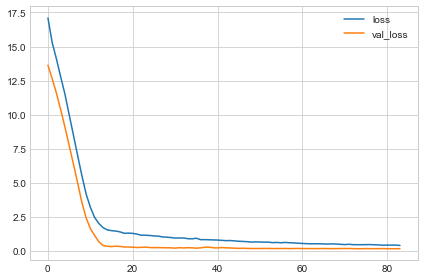

In [11]:
now1 = datetime.now()

model = keras.Sequential([
    
    layers.Dense(200,activation="relu",input_shape=[50]),
    layers.BatchNormalization(),
    layers.Dropout(5/25),
    
    
    #layers.Dense(4,activation="relu"),
    #layers.BatchNormalization(),
    
    layers.Dense(1)
])

model.compile(
    optimizer='adam',
    loss='MeanSquaredError',
    metrics=['MeanSquaredError'],
)

early_stopping = keras.callbacks.EarlyStopping(
    patience=10,
    min_delta=0.001,
    restore_best_weights=True,
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    batch_size=1323,
    epochs=100,
    callbacks=[early_stopping],
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print(color.BOLD +
      "\nMínima suma de los cuadrados de los errores: {}".format(history_df['val_loss'].min())+
      color.END)

now2 = datetime.now()
now2-now1

Como el modelo de 200 neuronas funciona mejor que el de 100 neuronas, pruebo con 300 neuronas:

Epoch 1/100
9/9 [==============================] - 0s 20ms/step - loss: 16.8749 - mean_squared_error: 16.8749 - val_loss: 13.7856 - val_mean_squared_error: 13.7856
Epoch 2/100
9/9 [==============================] - 0s 13ms/step - loss: 15.0002 - mean_squared_error: 15.0002 - val_loss: 12.4980 - val_mean_squared_error: 12.4980
Epoch 3/100
9/9 [==============================] - 0s 11ms/step - loss: 13.4227 - mean_squared_error: 13.4227 - val_loss: 11.2019 - val_mean_squared_error: 11.2019
Epoch 4/100
9/9 [==============================] - 0s 10ms/step - loss: 11.9436 - mean_squared_error: 11.9436 - val_loss: 9.8287 - val_mean_squared_error: 9.8287
Epoch 5/100
9/9 [==============================] - 0s 11ms/step - loss: 10.2994 - mean_squared_error: 10.2994 - val_loss: 8.3078 - val_mean_squared_error: 8.3078
Epoch 6/100
9/9 [==============================] - 0s 11ms/step - loss: 8.5948 - mean_squared_error: 8.5948 - val_loss: 6.5446 - val_mean_squared_error: 6.5446
Epoch 7/100
9/9 [=======

datetime.timedelta(seconds=5, microseconds=232673)

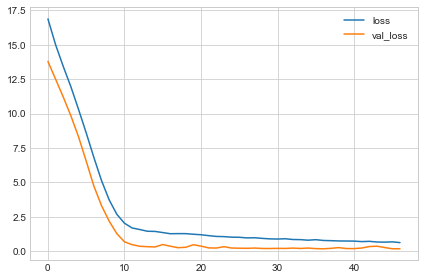

In [12]:
now1 = datetime.now()

model = keras.Sequential([
    
    layers.Dense(300,activation="relu",input_shape=[50]),
    layers.BatchNormalization(),
    layers.Dropout(1/5),
    
    
    #layers.Dense(4,activation="relu"),
    #layers.BatchNormalization(),
    
    layers.Dense(1)
])

model.compile(
    optimizer='adam',
    loss='MeanSquaredError',
    metrics=['MeanSquaredError'],
)

early_stopping = keras.callbacks.EarlyStopping(
    patience=10,
    min_delta=0.001,
    restore_best_weights=True,
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    batch_size=1323,
    epochs=100,
    callbacks=[early_stopping],
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print(color.BOLD +
      "\nMínima suma de los cuadrados de los errores: {}".format(history_df['val_loss'].min())+
      color.END)

now2 = datetime.now()
now2-now1

El modelo empieza a empeorar, por lo que concluyo que 300 neuronas son excesivas. Pruebo con 250:

Epoch 1/100
9/9 [==============================] - 0s 19ms/step - loss: 17.1808 - mean_squared_error: 17.1808 - val_loss: 17.7286 - val_mean_squared_error: 17.7286
Epoch 2/100
9/9 [==============================] - 0s 13ms/step - loss: 15.2052 - mean_squared_error: 15.2052 - val_loss: 15.9730 - val_mean_squared_error: 15.9730
Epoch 3/100
9/9 [==============================] - 0s 10ms/step - loss: 13.8120 - mean_squared_error: 13.8120 - val_loss: 14.2343 - val_mean_squared_error: 14.2343
Epoch 4/100
9/9 [==============================] - 0s 10ms/step - loss: 12.4811 - mean_squared_error: 12.4811 - val_loss: 12.6246 - val_mean_squared_error: 12.6246
Epoch 5/100
9/9 [==============================] - 0s 10ms/step - loss: 11.1412 - mean_squared_error: 11.1412 - val_loss: 10.9522 - val_mean_squared_error: 10.9522
Epoch 6/100
9/9 [==============================] - 0s 10ms/step - loss: 9.6899 - mean_squared_error: 9.6899 - val_loss: 9.3635 - val_mean_squared_error: 9.3635
Epoch 7/100
9/9 [===

Epoch 52/100
9/9 [==============================] - 0s 10ms/step - loss: 0.5675 - mean_squared_error: 0.5675 - val_loss: 0.1774 - val_mean_squared_error: 0.1774
Epoch 53/100
9/9 [==============================] - 0s 10ms/step - loss: 0.5953 - mean_squared_error: 0.5953 - val_loss: 0.1862 - val_mean_squared_error: 0.1862
Epoch 54/100
9/9 [==============================] - 0s 9ms/step - loss: 0.5660 - mean_squared_error: 0.5660 - val_loss: 0.2067 - val_mean_squared_error: 0.2067
Epoch 55/100
9/9 [==============================] - 0s 10ms/step - loss: 0.5517 - mean_squared_error: 0.5517 - val_loss: 0.2064 - val_mean_squared_error: 0.2064
Epoch 56/100
9/9 [==============================] - 0s 10ms/step - loss: 0.5418 - mean_squared_error: 0.5418 - val_loss: 0.1811 - val_mean_squared_error: 0.1811
Epoch 57/100
9/9 [==============================] - 0s 10ms/step - loss: 0.5501 - mean_squared_error: 0.5501 - val_loss: 0.1771 - val_mean_squared_error: 0.1771
Epoch 58/100
9/9 [=================

datetime.timedelta(seconds=9, microseconds=646665)

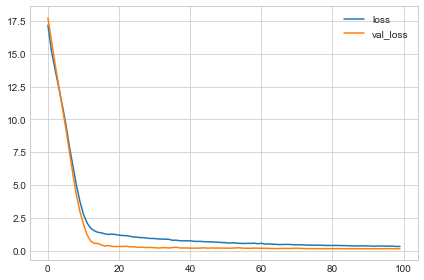

In [13]:
now1 = datetime.now()

model = keras.Sequential([
    
    layers.Dense(250,activation="relu",input_shape=[50]),
    layers.BatchNormalization(),
    layers.Dropout(1/5),
    
    
    #layers.Dense(4,activation="relu"),
    #layers.BatchNormalization(),
    
    layers.Dense(1)
])

model.compile(
    optimizer='adam',
    loss='MeanSquaredError',
    metrics=['MeanSquaredError'],
)

early_stopping = keras.callbacks.EarlyStopping(
    patience=10,
    min_delta=0.001,
    restore_best_weights=True,
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    batch_size=1323,
    epochs=100,
    callbacks=[early_stopping],
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print(color.BOLD +
      "\nMínima suma de los cuadrados de los errores: {}".format(history_df['val_loss'].min())+
      color.END)

now2 = datetime.now()
now2-now1

El modelo de 250 neuronas funciona mejor que todos los demás modelos de una sóla capa.

Pruebo un último modelo de una sola capa, con 150 neuronas:

Epoch 1/100
9/9 [==============================] - 0s 17ms/step - loss: 17.5408 - mean_squared_error: 17.5408 - val_loss: 12.3947 - val_mean_squared_error: 12.3947
Epoch 2/100
9/9 [==============================] - 0s 8ms/step - loss: 15.7024 - mean_squared_error: 15.7024 - val_loss: 11.7021 - val_mean_squared_error: 11.7021
Epoch 3/100
9/9 [==============================] - 0s 7ms/step - loss: 14.4219 - mean_squared_error: 14.4219 - val_loss: 10.8981 - val_mean_squared_error: 10.8981
Epoch 4/100
9/9 [==============================] - 0s 6ms/step - loss: 13.2087 - mean_squared_error: 13.2087 - val_loss: 10.0022 - val_mean_squared_error: 10.0022
Epoch 5/100
9/9 [==============================] - 0s 7ms/step - loss: 11.9908 - mean_squared_error: 11.9908 - val_loss: 8.9860 - val_mean_squared_error: 8.9860
Epoch 6/100
9/9 [==============================] - 0s 6ms/step - loss: 10.9124 - mean_squared_error: 10.9124 - val_loss: 7.9097 - val_mean_squared_error: 7.9097
Epoch 7/100
9/9 [========

datetime.timedelta(seconds=2, microseconds=877616)

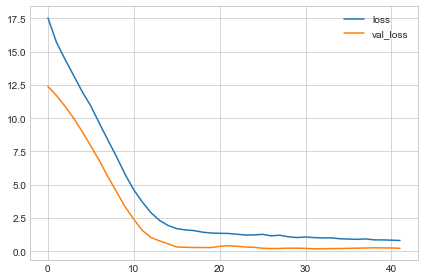

In [18]:
now1 = datetime.now()

model = keras.Sequential([
    
    layers.Dense(150,activation="relu",input_shape=[50]),
    layers.BatchNormalization(),
    layers.Dropout(1/5),
    
    
    #layers.Dense(4,activation="relu"),
    #layers.BatchNormalization(),
    
    layers.Dense(1)
])

model.compile(
    optimizer='adam',
    loss='MeanSquaredError',
    metrics=['MeanSquaredError'],
)

early_stopping = keras.callbacks.EarlyStopping(
    patience=10,
    min_delta=0.001,
    restore_best_weights=True,
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    batch_size=1323,
    epochs=100,
    callbacks=[early_stopping],
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print(color.BOLD +
      "\nMínima suma de los cuadrados de los errores: {}".format(history_df['val_loss'].min())+
      color.END)

now2 = datetime.now()
now2-now1

C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


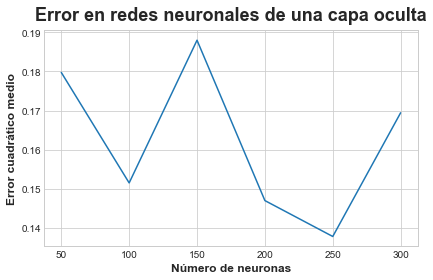

In [20]:
sns.lineplot([50,100,150,200,250,300],
             [0.17972807586193085,0.15150186419487,0.18796531856060028,0.14698903262615204,0.13781560957431793,0.16942547261714935])
plt.xlabel('Número de neuronas')
plt.ylabel('Error cuadrático medio')
plt.title('Error en redes neuronales de una capa oculta')
plt.show()

Concluyo que el modelo óptimo de una capa oculta es el de 250 neuronas.

Pruebo ahora a añadir una segunda capa, de 10 neuronas.

Epoch 1/100
9/9 [==============================] - 1s 22ms/step - loss: 17.2589 - mean_squared_error: 17.2589 - val_loss: 15.4790 - val_mean_squared_error: 15.4790
Epoch 2/100
9/9 [==============================] - 0s 13ms/step - loss: 16.2246 - mean_squared_error: 16.2246 - val_loss: 15.4750 - val_mean_squared_error: 15.4750
Epoch 3/100
9/9 [==============================] - 0s 12ms/step - loss: 15.7696 - mean_squared_error: 15.7696 - val_loss: 15.1211 - val_mean_squared_error: 15.1211
Epoch 4/100
9/9 [==============================] - 0s 12ms/step - loss: 15.4032 - mean_squared_error: 15.4032 - val_loss: 14.6121 - val_mean_squared_error: 14.6121
Epoch 5/100
9/9 [==============================] - 0s 10ms/step - loss: 15.0628 - mean_squared_error: 15.0628 - val_loss: 14.1777 - val_mean_squared_error: 14.1777
Epoch 6/100
9/9 [==============================] - 0s 10ms/step - loss: 14.7298 - mean_squared_error: 14.7298 - val_loss: 13.7895 - val_mean_squared_error: 13.7895
Epoch 7/100
9/9 

datetime.timedelta(seconds=9, microseconds=286132)

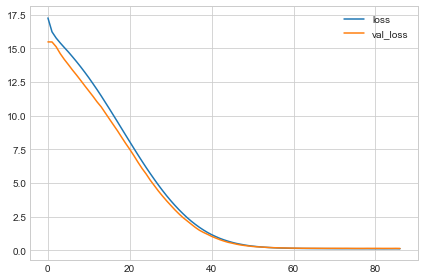

In [34]:
now1 = datetime.now()

model = keras.Sequential([
    
    layers.Dense(250,activation="relu",input_shape=[50]),
    layers.BatchNormalization(),
    layers.Dropout(1/5),
    
    
    layers.Dense(10,activation="relu"),
    layers.BatchNormalization(),
    
    layers.Dense(1)
])

model.compile(
    optimizer='adam',
    loss='MeanSquaredError',
    metrics=['MeanSquaredError'],
)

early_stopping = keras.callbacks.EarlyStopping(
    patience=10,
    min_delta=0.001,
    restore_best_weights=True,
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    batch_size=1323,
    epochs=100,
    callbacks=[early_stopping],
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print(color.BOLD +
      "\nMínima suma de los cuadrados de los errores: {}".format(history_df['val_loss'].min())+
      color.END)

now2 = datetime.now()
now2-now1

El modelo mejora ligeramente. Pruebo a reducir el número de neuronas de la primera capa y de añadir dropout a la segunda. Si el modelo esta sobreajustado, estas medidas lo mejorarán:

Epoch 1/100
9/9 [==============================] - 1s 17ms/step - loss: 17.9014 - mean_squared_error: 17.9014 - val_loss: 13.8887 - val_mean_squared_error: 13.8887
Epoch 2/100
9/9 [==============================] - 0s 9ms/step - loss: 16.9658 - mean_squared_error: 16.9658 - val_loss: 13.8506 - val_mean_squared_error: 13.8506
Epoch 3/100
9/9 [==============================] - 0s 9ms/step - loss: 16.5093 - mean_squared_error: 16.5093 - val_loss: 13.7372 - val_mean_squared_error: 13.7372
Epoch 4/100
9/9 [==============================] - 0s 8ms/step - loss: 15.9973 - mean_squared_error: 15.9973 - val_loss: 13.5277 - val_mean_squared_error: 13.5277
Epoch 5/100
9/9 [==============================] - 0s 9ms/step - loss: 15.5558 - mean_squared_error: 15.5558 - val_loss: 13.3548 - val_mean_squared_error: 13.3548
Epoch 6/100
9/9 [==============================] - 0s 7ms/step - loss: 15.0898 - mean_squared_error: 15.0898 - val_loss: 13.1721 - val_mean_squared_error: 13.1721
Epoch 7/100
9/9 [====

Epoch 52/100
9/9 [==============================] - 0s 8ms/step - loss: 1.2370 - mean_squared_error: 1.2370 - val_loss: 0.3358 - val_mean_squared_error: 0.3358
Epoch 53/100
9/9 [==============================] - 0s 8ms/step - loss: 1.2120 - mean_squared_error: 1.2120 - val_loss: 0.3082 - val_mean_squared_error: 0.3082
Epoch 54/100
9/9 [==============================] - 0s 8ms/step - loss: 1.1396 - mean_squared_error: 1.1396 - val_loss: 0.2871 - val_mean_squared_error: 0.2871
Epoch 55/100
9/9 [==============================] - 0s 7ms/step - loss: 1.1320 - mean_squared_error: 1.1320 - val_loss: 0.2670 - val_mean_squared_error: 0.2670
Epoch 56/100
9/9 [==============================] - 0s 8ms/step - loss: 1.0861 - mean_squared_error: 1.0861 - val_loss: 0.2502 - val_mean_squared_error: 0.2502
Epoch 57/100
9/9 [==============================] - 0s 9ms/step - loss: 1.0437 - mean_squared_error: 1.0437 - val_loss: 0.2382 - val_mean_squared_error: 0.2382
Epoch 58/100
9/9 [======================

datetime.timedelta(seconds=7, microseconds=255064)

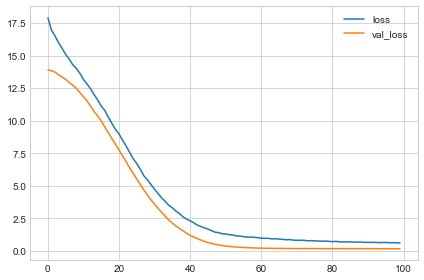

In [22]:
now1 = datetime.now()

model = keras.Sequential([
    
    layers.Dense(100,activation="relu",input_shape=[50]),
    layers.BatchNormalization(),
    layers.Dropout(1/5),
    
    
    layers.Dense(10,activation="relu"),
    layers.BatchNormalization(),
    layers.Dropout(1/5),
    
    layers.Dense(1)
])

model.compile(
    optimizer='adam',
    loss='MeanSquaredError',
    metrics=['MeanSquaredError'],
)

early_stopping = keras.callbacks.EarlyStopping(
    patience=10,
    min_delta=0.001,
    restore_best_weights=True,
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    batch_size=1323,
    epochs=100,
    callbacks=[early_stopping],
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print(color.BOLD +
      "\nMínima suma de los cuadrados de los errores: {}".format(history_df['val_loss'].min())+
      color.END)

now2 = datetime.now()
now2-now1

El modelo empeora. Pruebo a reducir el Dropout en la segunda capa:

Epoch 1/100
9/9 [==============================] - 1s 18ms/step - loss: 17.3225 - mean_squared_error: 17.3225 - val_loss: 16.6396 - val_mean_squared_error: 16.6396
Epoch 2/100
9/9 [==============================] - 0s 9ms/step - loss: 16.5561 - mean_squared_error: 16.5561 - val_loss: 16.3134 - val_mean_squared_error: 16.3134
Epoch 3/100
9/9 [==============================] - 0s 7ms/step - loss: 16.0701 - mean_squared_error: 16.0701 - val_loss: 15.9280 - val_mean_squared_error: 15.9280
Epoch 4/100
9/9 [==============================] - 0s 8ms/step - loss: 15.6414 - mean_squared_error: 15.6414 - val_loss: 15.4593 - val_mean_squared_error: 15.4593
Epoch 5/100
9/9 [==============================] - 0s 7ms/step - loss: 15.2863 - mean_squared_error: 15.2863 - val_loss: 14.9320 - val_mean_squared_error: 14.9320
Epoch 6/100
9/9 [==============================] - 0s 7ms/step - loss: 14.9987 - mean_squared_error: 14.9987 - val_loss: 14.3876 - val_mean_squared_error: 14.3876
Epoch 7/100
9/9 [====

Epoch 52/100
9/9 [==============================] - 0s 6ms/step - loss: 0.7306 - mean_squared_error: 0.7306 - val_loss: 0.3239 - val_mean_squared_error: 0.3239
Epoch 53/100
9/9 [==============================] - 0s 7ms/step - loss: 0.7217 - mean_squared_error: 0.7217 - val_loss: 0.2946 - val_mean_squared_error: 0.2946
Epoch 54/100
9/9 [==============================] - 0s 7ms/step - loss: 0.6639 - mean_squared_error: 0.6639 - val_loss: 0.2686 - val_mean_squared_error: 0.2686
Epoch 55/100
9/9 [==============================] - 0s 8ms/step - loss: 0.6937 - mean_squared_error: 0.6937 - val_loss: 0.2442 - val_mean_squared_error: 0.2442
Epoch 56/100
9/9 [==============================] - 0s 6ms/step - loss: 0.6144 - mean_squared_error: 0.6144 - val_loss: 0.2276 - val_mean_squared_error: 0.2276
Epoch 57/100
9/9 [==============================] - 0s 7ms/step - loss: 0.6428 - mean_squared_error: 0.6428 - val_loss: 0.2141 - val_mean_squared_error: 0.2141
Epoch 58/100
9/9 [======================

datetime.timedelta(seconds=6, microseconds=535299)

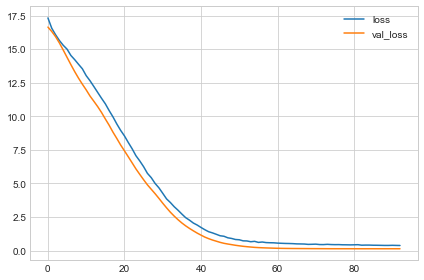

In [23]:
now1 = datetime.now()

model = keras.Sequential([
    
    layers.Dense(100,activation="relu",input_shape=[50]),
    layers.BatchNormalization(),
    layers.Dropout(1/5),
    
    
    layers.Dense(10,activation="relu"),
    layers.BatchNormalization(),
    layers.Dropout(1/10),
    
    layers.Dense(1)
])

model.compile(
    optimizer='adam',
    loss='MeanSquaredError',
    metrics=['MeanSquaredError'],
)

early_stopping = keras.callbacks.EarlyStopping(
    patience=10,
    min_delta=0.001,
    restore_best_weights=True,
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    batch_size=1323,
    epochs=100,
    callbacks=[early_stopping],
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print(color.BOLD +
      "\nMínima suma de los cuadrados de los errores: {}".format(history_df['val_loss'].min())+
      color.END)

now2 = datetime.now()
now2-now1

El modelo mejora al reducir el Dropout. Esto sugiere infraajuste. Añado neuronas a la segunda capa, hasta 20:

Epoch 1/100
9/9 [==============================] - 1s 17ms/step - loss: 17.9403 - mean_squared_error: 17.9403 - val_loss: 17.7653 - val_mean_squared_error: 17.7653
Epoch 2/100
9/9 [==============================] - 0s 8ms/step - loss: 16.6393 - mean_squared_error: 16.6393 - val_loss: 16.1353 - val_mean_squared_error: 16.1353
Epoch 3/100
9/9 [==============================] - 0s 7ms/step - loss: 15.8945 - mean_squared_error: 15.8945 - val_loss: 14.9797 - val_mean_squared_error: 14.9797
Epoch 4/100
9/9 [==============================] - 0s 7ms/step - loss: 15.2887 - mean_squared_error: 15.2887 - val_loss: 14.1320 - val_mean_squared_error: 14.1320
Epoch 5/100
9/9 [==============================] - 0s 6ms/step - loss: 14.7938 - mean_squared_error: 14.7938 - val_loss: 13.4771 - val_mean_squared_error: 13.4771
Epoch 6/100
9/9 [==============================] - 0s 6ms/step - loss: 14.2990 - mean_squared_error: 14.2990 - val_loss: 12.8542 - val_mean_squared_error: 12.8542
Epoch 7/100
9/9 [====

Epoch 52/100
9/9 [==============================] - 0s 7ms/step - loss: 0.6136 - mean_squared_error: 0.6136 - val_loss: 0.1703 - val_mean_squared_error: 0.1703
Epoch 53/100
9/9 [==============================] - 0s 7ms/step - loss: 0.6408 - mean_squared_error: 0.6408 - val_loss: 0.1665 - val_mean_squared_error: 0.1665
Epoch 54/100
9/9 [==============================] - 0s 6ms/step - loss: 0.6356 - mean_squared_error: 0.6356 - val_loss: 0.1671 - val_mean_squared_error: 0.1671
Epoch 55/100
9/9 [==============================] - 0s 6ms/step - loss: 0.5802 - mean_squared_error: 0.5802 - val_loss: 0.1656 - val_mean_squared_error: 0.1656
Epoch 56/100
9/9 [==============================] - 0s 6ms/step - loss: 0.5778 - mean_squared_error: 0.5778 - val_loss: 0.1669 - val_mean_squared_error: 0.1669
Epoch 57/100
9/9 [==============================] - 0s 6ms/step - loss: 0.5598 - mean_squared_error: 0.5598 - val_loss: 0.1649 - val_mean_squared_error: 0.1649
Epoch 58/100
9/9 [======================

datetime.timedelta(seconds=6, microseconds=567948)

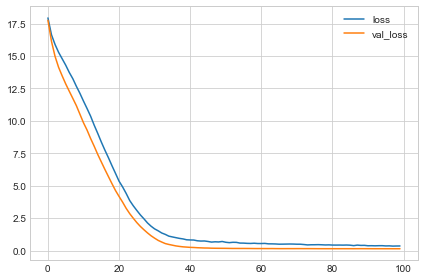

In [26]:
now1 = datetime.now()

model = keras.Sequential([
    
    layers.Dense(100,activation="relu",input_shape=[50]),
    layers.BatchNormalization(),
    layers.Dropout(1/5),
    
    
    layers.Dense(20,activation="relu"),
    layers.BatchNormalization(),
    layers.Dropout(1/10),
    
    layers.Dense(1)
])

model.compile(
    optimizer='adam',
    loss='MeanSquaredError',
    metrics=['MeanSquaredError'],
)

early_stopping = keras.callbacks.EarlyStopping(
    patience=10,
    min_delta=0.001,
    restore_best_weights=True,
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    batch_size=1323,
    epochs=100,
    callbacks=[early_stopping],
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print(color.BOLD +
      "\nMínima suma de los cuadrados de los errores: {}".format(history_df['val_loss'].min())+
      color.END)

now2 = datetime.now()
now2-now1

El error apenas cambia. Pruebo a seguir añadiendo neuronas a la segunda capa:

Epoch 1/100
9/9 [==============================] - 1s 19ms/step - loss: 17.6343 - mean_squared_error: 17.6343 - val_loss: 17.6066 - val_mean_squared_error: 17.6066
Epoch 2/100
9/9 [==============================] - 0s 10ms/step - loss: 16.4523 - mean_squared_error: 16.4523 - val_loss: 16.8824 - val_mean_squared_error: 16.8823
Epoch 3/100
9/9 [==============================] - 0s 7ms/step - loss: 15.7015 - mean_squared_error: 15.7015 - val_loss: 15.7756 - val_mean_squared_error: 15.7756
Epoch 4/100
9/9 [==============================] - 0s 7ms/step - loss: 15.1255 - mean_squared_error: 15.1255 - val_loss: 14.7493 - val_mean_squared_error: 14.7493
Epoch 5/100
9/9 [==============================] - 0s 8ms/step - loss: 14.4931 - mean_squared_error: 14.4931 - val_loss: 14.0915 - val_mean_squared_error: 14.0915
Epoch 6/100
9/9 [==============================] - 0s 7ms/step - loss: 13.9900 - mean_squared_error: 13.9900 - val_loss: 13.3250 - val_mean_squared_error: 13.3250
Epoch 7/100
9/9 [===

Epoch 52/100
9/9 [==============================] - 0s 10ms/step - loss: 0.5870 - mean_squared_error: 0.5870 - val_loss: 0.1886 - val_mean_squared_error: 0.1886
Epoch 53/100
9/9 [==============================] - 0s 6ms/step - loss: 0.5812 - mean_squared_error: 0.5812 - val_loss: 0.1911 - val_mean_squared_error: 0.1911
Epoch 54/100
9/9 [==============================] - 0s 7ms/step - loss: 0.5725 - mean_squared_error: 0.5725 - val_loss: 0.1842 - val_mean_squared_error: 0.1842
Epoch 55/100
9/9 [==============================] - 0s 6ms/step - loss: 0.5528 - mean_squared_error: 0.5528 - val_loss: 0.1869 - val_mean_squared_error: 0.1869
Epoch 56/100
9/9 [==============================] - 0s 7ms/step - loss: 0.5366 - mean_squared_error: 0.5366 - val_loss: 0.1883 - val_mean_squared_error: 0.1883
Epoch 57/100
9/9 [==============================] - 0s 7ms/step - loss: 0.5346 - mean_squared_error: 0.5346 - val_loss: 0.1854 - val_mean_squared_error: 0.1854
Epoch 58/100
9/9 [=====================

datetime.timedelta(seconds=7, microseconds=358672)

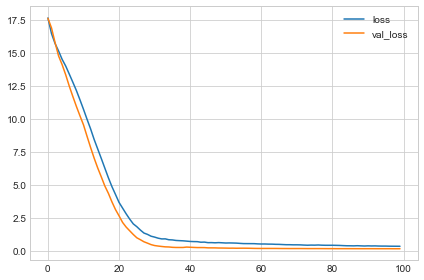

In [27]:
now1 = datetime.now()

model = keras.Sequential([
    
    layers.Dense(100,activation="relu",input_shape=[50]),
    layers.BatchNormalization(),
    layers.Dropout(1/5),
    
    
    layers.Dense(30,activation="relu"),
    layers.BatchNormalization(),
    layers.Dropout(1/10),
    
    layers.Dense(1)
])

model.compile(
    optimizer='adam',
    loss='MeanSquaredError',
    metrics=['MeanSquaredError'],
)

early_stopping = keras.callbacks.EarlyStopping(
    patience=10,
    min_delta=0.001,
    restore_best_weights=True,
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    batch_size=1323,
    epochs=100,
    callbacks=[early_stopping],
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print(color.BOLD +
      "\nMínima suma de los cuadrados de los errores: {}".format(history_df['val_loss'].min())+
      color.END)

now2 = datetime.now()
now2-now1

El error apenas cambia. Pruebo a añadir más neuronas a la segunda capa.

Epoch 1/100
9/9 [==============================] - 1s 19ms/step - loss: 17.4861 - mean_squared_error: 17.4861 - val_loss: 17.3352 - val_mean_squared_error: 17.3352
Epoch 2/100
9/9 [==============================] - 0s 10ms/step - loss: 16.2612 - mean_squared_error: 16.2612 - val_loss: 16.3143 - val_mean_squared_error: 16.3143
Epoch 3/100
9/9 [==============================] - 0s 9ms/step - loss: 15.6342 - mean_squared_error: 15.6342 - val_loss: 15.5314 - val_mean_squared_error: 15.5314
Epoch 4/100
9/9 [==============================] - 0s 8ms/step - loss: 14.9887 - mean_squared_error: 14.9887 - val_loss: 14.5645 - val_mean_squared_error: 14.5645
Epoch 5/100
9/9 [==============================] - 0s 8ms/step - loss: 14.3702 - mean_squared_error: 14.3702 - val_loss: 13.5642 - val_mean_squared_error: 13.5642
Epoch 6/100
9/9 [==============================] - 0s 8ms/step - loss: 13.8459 - mean_squared_error: 13.8459 - val_loss: 12.5842 - val_mean_squared_error: 12.5842
Epoch 7/100
9/9 [===

9/9 [==============================] - 0s 8ms/step - loss: 0.5352 - mean_squared_error: 0.5352 - val_loss: 0.1608 - val_mean_squared_error: 0.1608
Epoch 53/100
9/9 [==============================] - 0s 7ms/step - loss: 0.5334 - mean_squared_error: 0.5334 - val_loss: 0.1618 - val_mean_squared_error: 0.1618
Epoch 54/100
9/9 [==============================] - 0s 8ms/step - loss: 0.5147 - mean_squared_error: 0.5147 - val_loss: 0.1621 - val_mean_squared_error: 0.1621
Epoch 55/100
9/9 [==============================] - 0s 8ms/step - loss: 0.5087 - mean_squared_error: 0.5087 - val_loss: 0.1596 - val_mean_squared_error: 0.1596
Epoch 56/100
9/9 [==============================] - 0s 7ms/step - loss: 0.4962 - mean_squared_error: 0.4962 - val_loss: 0.1599 - val_mean_squared_error: 0.1599
Epoch 57/100
9/9 [==============================] - 0s 7ms/step - loss: 0.5140 - mean_squared_error: 0.5140 - val_loss: 0.1604 - val_mean_squared_error: 0.1604
Epoch 58/100
9/9 [==============================] - 0

datetime.timedelta(seconds=7, microseconds=54299)

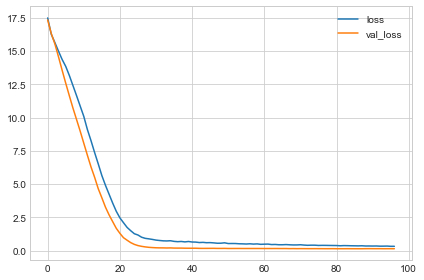

In [28]:
now1 = datetime.now()

model = keras.Sequential([
    
    layers.Dense(100,activation="relu",input_shape=[50]),
    layers.BatchNormalization(),
    layers.Dropout(1/5),
    
    
    layers.Dense(40,activation="relu"),
    layers.BatchNormalization(),
    layers.Dropout(1/10),
    
    layers.Dense(1)
])

model.compile(
    optimizer='adam',
    loss='MeanSquaredError',
    metrics=['MeanSquaredError'],
)

early_stopping = keras.callbacks.EarlyStopping(
    patience=10,
    min_delta=0.001,
    restore_best_weights=True,
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    batch_size=1323,
    epochs=100,
    callbacks=[early_stopping],
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print(color.BOLD +
      "\nMínima suma de los cuadrados de los errores: {}".format(history_df['val_loss'].min())+
      color.END)

now2 = datetime.now()
now2-now1

El error mejora ligeramente. Al aumentar el número de neuronas de la segunda capa, tandría sentido aumentar también la cantidad de Dropout:

Epoch 1/100
9/9 [==============================] - 1s 19ms/step - loss: 18.9389 - mean_squared_error: 18.9389 - val_loss: 20.3251 - val_mean_squared_error: 20.3251
Epoch 2/100
9/9 [==============================] - 0s 9ms/step - loss: 16.8099 - mean_squared_error: 16.8099 - val_loss: 18.0185 - val_mean_squared_error: 18.0185
Epoch 3/100
9/9 [==============================] - 0s 9ms/step - loss: 15.9157 - mean_squared_error: 15.9157 - val_loss: 16.6980 - val_mean_squared_error: 16.6980
Epoch 4/100
9/9 [==============================] - 0s 7ms/step - loss: 15.1804 - mean_squared_error: 15.1804 - val_loss: 15.5051 - val_mean_squared_error: 15.5051
Epoch 5/100
9/9 [==============================] - 0s 7ms/step - loss: 14.5571 - mean_squared_error: 14.5571 - val_loss: 14.4373 - val_mean_squared_error: 14.4373
Epoch 6/100
9/9 [==============================] - 0s 7ms/step - loss: 13.9355 - mean_squared_error: 13.9355 - val_loss: 13.4064 - val_mean_squared_error: 13.4064
Epoch 7/100
9/9 [====

Epoch 52/100
9/9 [==============================] - 0s 7ms/step - loss: 0.8550 - mean_squared_error: 0.8550 - val_loss: 0.1756 - val_mean_squared_error: 0.1756
Epoch 53/100
9/9 [==============================] - 0s 8ms/step - loss: 0.8267 - mean_squared_error: 0.8267 - val_loss: 0.1729 - val_mean_squared_error: 0.1729
Epoch 54/100
9/9 [==============================] - 0s 8ms/step - loss: 0.8292 - mean_squared_error: 0.8292 - val_loss: 0.1727 - val_mean_squared_error: 0.1727
Epoch 55/100
9/9 [==============================] - 0s 7ms/step - loss: 0.8258 - mean_squared_error: 0.8258 - val_loss: 0.1742 - val_mean_squared_error: 0.1742
Epoch 56/100
9/9 [==============================] - 0s 6ms/step - loss: 0.7725 - mean_squared_error: 0.7725 - val_loss: 0.1743 - val_mean_squared_error: 0.1743
Epoch 57/100
9/9 [==============================] - 0s 7ms/step - loss: 0.7890 - mean_squared_error: 0.7890 - val_loss: 0.1686 - val_mean_squared_error: 0.1686
Epoch 58/100
9/9 [======================

datetime.timedelta(seconds=7, microseconds=275948)

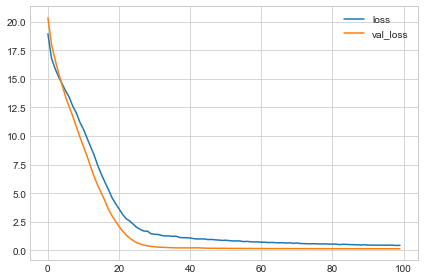

In [29]:
now1 = datetime.now()

model = keras.Sequential([
    
    layers.Dense(100,activation="relu",input_shape=[50]),
    layers.BatchNormalization(),
    layers.Dropout(1/5),
    
    
    layers.Dense(40,activation="relu"),
    layers.BatchNormalization(),
    layers.Dropout(1/5),
    
    layers.Dense(1)
])

model.compile(
    optimizer='adam',
    loss='MeanSquaredError',
    metrics=['MeanSquaredError'],
)

early_stopping = keras.callbacks.EarlyStopping(
    patience=10,
    min_delta=0.001,
    restore_best_weights=True,
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    batch_size=1323,
    epochs=100,
    callbacks=[early_stopping],
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print(color.BOLD +
      "\nMínima suma de los cuadrados de los errores: {}".format(history_df['val_loss'].min())+
      color.END)

now2 = datetime.now()
now2-now1

El error aumenta, lo que sugiere infraajuste. Añado una tercera capa y reduzco el Dropout de la segunda:

Epoch 1/100
9/9 [==============================] - 1s 20ms/step - loss: 17.1982 - mean_squared_error: 17.1982 - val_loss: 13.4676 - val_mean_squared_error: 13.4676
Epoch 2/100
9/9 [==============================] - 0s 9ms/step - loss: 16.3284 - mean_squared_error: 16.3284 - val_loss: 13.7249 - val_mean_squared_error: 13.7249
Epoch 3/100
9/9 [==============================] - 0s 8ms/step - loss: 15.8547 - mean_squared_error: 15.8547 - val_loss: 13.7788 - val_mean_squared_error: 13.7788
Epoch 4/100
9/9 [==============================] - 0s 7ms/step - loss: 15.4833 - mean_squared_error: 15.4833 - val_loss: 13.7686 - val_mean_squared_error: 13.7686
Epoch 5/100
9/9 [==============================] - 0s 7ms/step - loss: 15.1454 - mean_squared_error: 15.1454 - val_loss: 13.7575 - val_mean_squared_error: 13.7575
Epoch 6/100
9/9 [==============================] - 0s 10ms/step - loss: 14.8086 - mean_squared_error: 14.8086 - val_loss: 13.6863 - val_mean_squared_error: 13.6863
Epoch 7/100
9/9 [===

Epoch 52/100
9/9 [==============================] - 0s 7ms/step - loss: 0.2954 - mean_squared_error: 0.2954 - val_loss: 0.2628 - val_mean_squared_error: 0.2628
Epoch 53/100
9/9 [==============================] - 0s 6ms/step - loss: 0.2718 - mean_squared_error: 0.2718 - val_loss: 0.2423 - val_mean_squared_error: 0.2423
Epoch 54/100
9/9 [==============================] - 0s 8ms/step - loss: 0.2463 - mean_squared_error: 0.2463 - val_loss: 0.2198 - val_mean_squared_error: 0.2198
Epoch 55/100
9/9 [==============================] - 0s 7ms/step - loss: 0.2239 - mean_squared_error: 0.2239 - val_loss: 0.2053 - val_mean_squared_error: 0.2053
Epoch 56/100
9/9 [==============================] - 0s 8ms/step - loss: 0.2099 - mean_squared_error: 0.2099 - val_loss: 0.1932 - val_mean_squared_error: 0.1932
Epoch 57/100
9/9 [==============================] - 0s 7ms/step - loss: 0.1965 - mean_squared_error: 0.1965 - val_loss: 0.1788 - val_mean_squared_error: 0.1788
Epoch 58/100
9/9 [======================

datetime.timedelta(seconds=7, microseconds=80039)

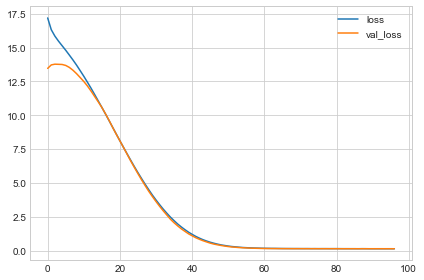

In [31]:
now1 = datetime.now()

model = keras.Sequential([
    
    layers.Dense(100,activation="relu",input_shape=[50]),
    layers.BatchNormalization(),
    layers.Dropout(1/5),
    
    
    layers.Dense(40,activation="relu"),
    layers.BatchNormalization(),
    layers.Dropout(1/10),
    
    layers.Dense(10,activation="relu"),
    layers.BatchNormalization(),
    
    layers.Dense(1)
])

model.compile(
    optimizer='adam',
    loss='MeanSquaredError',
    metrics=['MeanSquaredError'],
)

early_stopping = keras.callbacks.EarlyStopping(
    patience=10,
    min_delta=0.001,
    restore_best_weights=True,
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    batch_size=1323,
    epochs=100,
    callbacks=[early_stopping],
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print(color.BOLD +
      "\nMínima suma de los cuadrados de los errores: {}".format(history_df['val_loss'].min())+
      color.END)

now2 = datetime.now()
now2-now1

El modelo mejora mucho, de momento es el modelo con mejores resultados. Pruebo a añadir Dropout en la última capa.

Epoch 1/100
9/9 [==============================] - 1s 21ms/step - loss: 17.2836 - mean_squared_error: 17.2836 - val_loss: 16.7788 - val_mean_squared_error: 16.7788
Epoch 2/100
9/9 [==============================] - 0s 11ms/step - loss: 16.5202 - mean_squared_error: 16.5202 - val_loss: 16.0702 - val_mean_squared_error: 16.0702
Epoch 3/100
9/9 [==============================] - 0s 10ms/step - loss: 16.1871 - mean_squared_error: 16.1871 - val_loss: 15.5223 - val_mean_squared_error: 15.5223
Epoch 4/100
9/9 [==============================] - 0s 9ms/step - loss: 15.7750 - mean_squared_error: 15.7750 - val_loss: 15.1006 - val_mean_squared_error: 15.1006
Epoch 5/100
9/9 [==============================] - 0s 9ms/step - loss: 15.4569 - mean_squared_error: 15.4569 - val_loss: 14.7183 - val_mean_squared_error: 14.7183
Epoch 6/100
9/9 [==============================] - 0s 8ms/step - loss: 15.2114 - mean_squared_error: 15.2114 - val_loss: 14.3393 - val_mean_squared_error: 14.3393
Epoch 7/100
9/9 [==

Epoch 52/100
9/9 [==============================] - 0s 7ms/step - loss: 0.7568 - mean_squared_error: 0.7568 - val_loss: 0.3270 - val_mean_squared_error: 0.3270
Epoch 53/100
9/9 [==============================] - 0s 8ms/step - loss: 0.7067 - mean_squared_error: 0.7067 - val_loss: 0.2950 - val_mean_squared_error: 0.2950
Epoch 54/100
9/9 [==============================] - 0s 7ms/step - loss: 0.6735 - mean_squared_error: 0.6735 - val_loss: 0.2698 - val_mean_squared_error: 0.2698
Epoch 55/100
9/9 [==============================] - 0s 8ms/step - loss: 0.6319 - mean_squared_error: 0.6319 - val_loss: 0.2512 - val_mean_squared_error: 0.2512
Epoch 56/100
9/9 [==============================] - 0s 10ms/step - loss: 0.6159 - mean_squared_error: 0.6159 - val_loss: 0.2339 - val_mean_squared_error: 0.2339
Epoch 57/100
9/9 [==============================] - 0s 8ms/step - loss: 0.6083 - mean_squared_error: 0.6083 - val_loss: 0.2213 - val_mean_squared_error: 0.2213
Epoch 58/100
9/9 [=====================

datetime.timedelta(seconds=8, microseconds=288488)

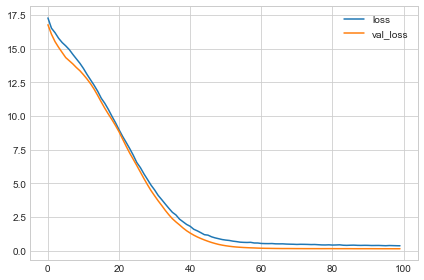

In [35]:
now1 = datetime.now()

model = keras.Sequential([
    
    layers.Dense(100,activation="relu",input_shape=[50]),
    layers.BatchNormalization(),
    layers.Dropout(1/5),
    
    
    layers.Dense(40,activation="relu"),
    layers.BatchNormalization(),
    layers.Dropout(1/10),
    
    layers.Dense(10,activation="relu"),
    layers.BatchNormalization(),
    layers.Dropout(1/10),
    
    layers.Dense(1)
])

model.compile(
    optimizer='adam',
    loss='MeanSquaredError',
    metrics=['MeanSquaredError'],
)

early_stopping = keras.callbacks.EarlyStopping(
    patience=10,
    min_delta=0.001,
    restore_best_weights=True,
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    batch_size=1323,
    epochs=100,
    callbacks=[early_stopping],
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print(color.BOLD +
      "\nMínima suma de los cuadrados de los errores: {}".format(history_df['val_loss'].min())+
      color.END)

now2 = datetime.now()
now2-now1

El modelo empeora. Elimino el Dropout, y pruebo a añadir más neuronas en la primera capa.

Epoch 1/100
9/9 [==============================] - 1s 22ms/step - loss: 17.2447 - mean_squared_error: 17.2447 - val_loss: 15.9337 - val_mean_squared_error: 15.9337
Epoch 2/100
9/9 [==============================] - 0s 12ms/step - loss: 16.3556 - mean_squared_error: 16.3556 - val_loss: 15.5930 - val_mean_squared_error: 15.5930
Epoch 3/100
9/9 [==============================] - 0s 10ms/step - loss: 15.9122 - mean_squared_error: 15.9122 - val_loss: 15.2686 - val_mean_squared_error: 15.2686
Epoch 4/100
9/9 [==============================] - 0s 10ms/step - loss: 15.5493 - mean_squared_error: 15.5493 - val_loss: 15.0252 - val_mean_squared_error: 15.0252
Epoch 5/100
9/9 [==============================] - 0s 10ms/step - loss: 15.2244 - mean_squared_error: 15.2244 - val_loss: 14.8023 - val_mean_squared_error: 14.8023
Epoch 6/100
9/9 [==============================] - 0s 9ms/step - loss: 14.8980 - mean_squared_error: 14.8980 - val_loss: 14.5031 - val_mean_squared_error: 14.5031
Epoch 7/100
9/9 [

Epoch 52/100
9/9 [==============================] - 0s 9ms/step - loss: 0.2986 - mean_squared_error: 0.2986 - val_loss: 0.2865 - val_mean_squared_error: 0.2865
Epoch 53/100
9/9 [==============================] - 0s 8ms/step - loss: 0.2704 - mean_squared_error: 0.2704 - val_loss: 0.2611 - val_mean_squared_error: 0.2611
Epoch 54/100
9/9 [==============================] - 0s 9ms/step - loss: 0.2430 - mean_squared_error: 0.2430 - val_loss: 0.2363 - val_mean_squared_error: 0.2363
Epoch 55/100
9/9 [==============================] - 0s 11ms/step - loss: 0.2300 - mean_squared_error: 0.2300 - val_loss: 0.2184 - val_mean_squared_error: 0.2184
Epoch 56/100
9/9 [==============================] - 0s 8ms/step - loss: 0.2101 - mean_squared_error: 0.2101 - val_loss: 0.2017 - val_mean_squared_error: 0.2017
Epoch 57/100
9/9 [==============================] - 0s 8ms/step - loss: 0.2020 - mean_squared_error: 0.2020 - val_loss: 0.1911 - val_mean_squared_error: 0.1911
Epoch 58/100
9/9 [=====================

datetime.timedelta(seconds=8, microseconds=619047)

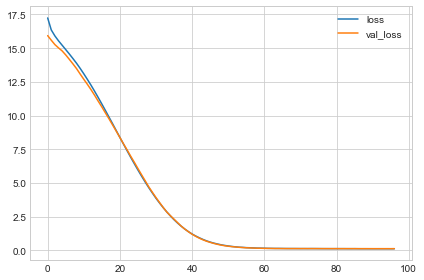

In [37]:
now1 = datetime.now()

model = keras.Sequential([
    
    layers.Dense(150,activation="relu",input_shape=[50]),
    layers.BatchNormalization(),
    layers.Dropout(1/5),
    
    
    layers.Dense(40,activation="relu"),
    layers.BatchNormalization(),
    layers.Dropout(1/10),
    
    layers.Dense(10,activation="relu"),
    layers.BatchNormalization(),
    
    layers.Dense(1)

])

model.compile(
    optimizer='adam',
    loss='MeanSquaredError',
    metrics=['MeanSquaredError'],
)

early_stopping = keras.callbacks.EarlyStopping(
    patience=10,
    min_delta=0.001,
    restore_best_weights=True,
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    batch_size=1323,
    epochs=100,
    callbacks=[early_stopping],
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print(color.BOLD +
      "\nMínima suma de los cuadrados de los errores: {}".format(history_df['val_loss'].min())+
      color.END)

now2 = datetime.now()
now2-now1

El error apenas cambia. Pruebo a añadir más neuronas a la primera capa:

Epoch 1/100
9/9 [==============================] - 1s 25ms/step - loss: 17.4139 - mean_squared_error: 17.4139 - val_loss: 16.2839 - val_mean_squared_error: 16.2839
Epoch 2/100
9/9 [==============================] - 0s 13ms/step - loss: 16.2803 - mean_squared_error: 16.2803 - val_loss: 16.0421 - val_mean_squared_error: 16.0421
Epoch 3/100
9/9 [==============================] - 0s 10ms/step - loss: 15.8143 - mean_squared_error: 15.8143 - val_loss: 15.6686 - val_mean_squared_error: 15.6686
Epoch 4/100
9/9 [==============================] - 0s 11ms/step - loss: 15.4659 - mean_squared_error: 15.4659 - val_loss: 15.3045 - val_mean_squared_error: 15.3045
Epoch 5/100
9/9 [==============================] - 0s 10ms/step - loss: 15.1273 - mean_squared_error: 15.1273 - val_loss: 14.8706 - val_mean_squared_error: 14.8706
Epoch 6/100
9/9 [==============================] - 0s 11ms/step - loss: 14.7894 - mean_squared_error: 14.7894 - val_loss: 14.3927 - val_mean_squared_error: 14.3927
Epoch 7/100
9/9 

datetime.timedelta(seconds=11, microseconds=9123)

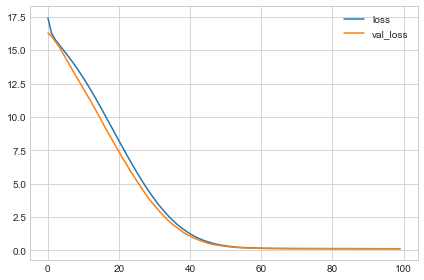

In [38]:
now1 = datetime.now()

model = keras.Sequential([
    
    layers.Dense(200,activation="relu",input_shape=[50]),
    layers.BatchNormalization(),
    layers.Dropout(1/5),
    
    layers.Dense(40,activation="relu"),
    layers.BatchNormalization(),
    layers.Dropout(1/10),
    
    layers.Dense(10,activation="relu"),
    layers.BatchNormalization(),
    
    layers.Dense(1)
])

model.compile(
    optimizer='adam',
    loss='MeanSquaredError',
    metrics=['MeanSquaredError'],
)

early_stopping = keras.callbacks.EarlyStopping(
    patience=10,
    min_delta=0.001,
    restore_best_weights=True,
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    batch_size=1323,
    epochs=100,
    callbacks=[early_stopping],
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print(color.BOLD +
      "\nMínima suma de los cuadrados de los errores: {}".format(history_df['val_loss'].min())+
      color.END)

now2 = datetime.now()
now2-now1

El error mejora. Es el menor error de momento. Pruebo a añadir más neuronas a la primera capa:

Epoch 1/100
9/9 [==============================] - 1s 25ms/step - loss: 17.1675 - mean_squared_error: 17.1675 - val_loss: 15.3402 - val_mean_squared_error: 15.3402
Epoch 2/100
9/9 [==============================] - 0s 13ms/step - loss: 16.1930 - mean_squared_error: 16.1930 - val_loss: 14.7138 - val_mean_squared_error: 14.7138
Epoch 3/100
9/9 [==============================] - 0s 11ms/step - loss: 15.7292 - mean_squared_error: 15.7292 - val_loss: 14.1997 - val_mean_squared_error: 14.1997
Epoch 4/100
9/9 [==============================] - 0s 11ms/step - loss: 15.3499 - mean_squared_error: 15.3499 - val_loss: 13.8422 - val_mean_squared_error: 13.8422
Epoch 5/100
9/9 [==============================] - 0s 11ms/step - loss: 14.9864 - mean_squared_error: 14.9864 - val_loss: 13.6034 - val_mean_squared_error: 13.6034
Epoch 6/100
9/9 [==============================] - 0s 12ms/step - loss: 14.6327 - mean_squared_error: 14.6327 - val_loss: 13.3629 - val_mean_squared_error: 13.3629
Epoch 7/100
9/9 

datetime.timedelta(seconds=9, microseconds=982824)

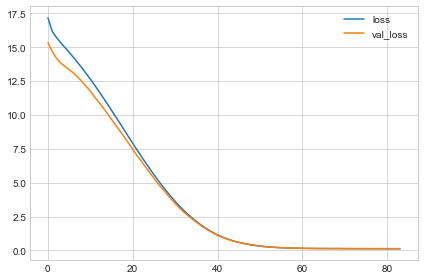

In [39]:
now1 = datetime.now()

model = keras.Sequential([
    
    layers.Dense(250,activation="relu",input_shape=[50]),
    layers.BatchNormalization(),
    layers.Dropout(1/5),
    
    layers.Dense(40,activation="relu"),
    layers.BatchNormalization(),
    layers.Dropout(1/10),
    
    layers.Dense(10,activation="relu"),
    layers.BatchNormalization(),
    
    layers.Dense(1)
])

model.compile(
    optimizer='adam',
    loss='MeanSquaredError',
    metrics=['MeanSquaredError'],
)

early_stopping = keras.callbacks.EarlyStopping(
    patience=10,
    min_delta=0.001,
    restore_best_weights=True,
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    batch_size=1323,
    epochs=100,
    callbacks=[early_stopping],
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print(color.BOLD +
      "\nMínima suma de los cuadrados de los errores: {}".format(history_df['val_loss'].min())+
      color.END)

now2 = datetime.now()
now2-now1

El modelo empeora ligeramente. Vuelvo al modelo anterior, y pruebo a añadir más neuronas a la segunda capa.

Epoch 1/100
9/9 [==============================] - 1s 26ms/step - loss: 17.9733 - mean_squared_error: 17.9733 - val_loss: 14.1172 - val_mean_squared_error: 14.1172
Epoch 2/100
9/9 [==============================] - 0s 14ms/step - loss: 16.4493 - mean_squared_error: 16.4493 - val_loss: 14.1874 - val_mean_squared_error: 14.1874
Epoch 3/100
9/9 [==============================] - 0s 13ms/step - loss: 15.7566 - mean_squared_error: 15.7566 - val_loss: 14.1629 - val_mean_squared_error: 14.1629
Epoch 4/100
9/9 [==============================] - 0s 12ms/step - loss: 15.2640 - mean_squared_error: 15.2640 - val_loss: 13.9924 - val_mean_squared_error: 13.9924
Epoch 5/100
9/9 [==============================] - 0s 12ms/step - loss: 14.7977 - mean_squared_error: 14.7977 - val_loss: 13.7948 - val_mean_squared_error: 13.7948
Epoch 6/100
9/9 [==============================] - 0s 12ms/step - loss: 14.3817 - mean_squared_error: 14.3817 - val_loss: 13.5659 - val_mean_squared_error: 13.5659
Epoch 7/100
9/9 

datetime.timedelta(seconds=11, microseconds=535013)

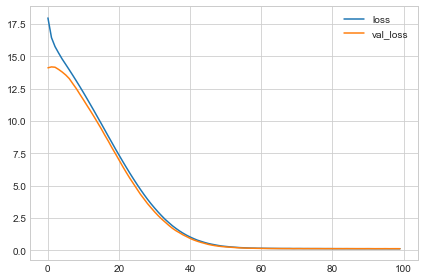

In [46]:
now1 = datetime.now()

model = keras.Sequential([
    
    layers.Dense(200,activation="relu",input_shape=[50]),
    layers.BatchNormalization(),
    layers.Dropout(1/5),
    
    layers.Dense(50,activation="relu"),
    layers.BatchNormalization(),
    layers.Dropout(1/10),
    
    layers.Dense(10,activation="relu"),
    layers.BatchNormalization(),
    
    layers.Dense(1)
])

model.compile(
    optimizer='adam',
    loss='MeanSquaredError',
    metrics=['MeanSquaredError'],
)

early_stopping = keras.callbacks.EarlyStopping(
    patience=10,
    min_delta=0.001,
    restore_best_weights=True,
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    batch_size=1323,
    epochs=100,
    callbacks=[early_stopping],
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print(color.BOLD +
      "\nMínima suma de los cuadrados de los errores: {}".format(history_df['val_loss'].min())+
      color.END)

now2 = datetime.now()
now2-now1

El modelo también empeora. Pruebo a añadir más neuronas a la tercera capa:

Epoch 1/100
9/9 [==============================] - 1s 28ms/step - loss: 17.0077 - mean_squared_error: 17.0077 - val_loss: 14.9528 - val_mean_squared_error: 14.9528
Epoch 2/100
9/9 [==============================] - 0s 14ms/step - loss: 16.0861 - mean_squared_error: 16.0861 - val_loss: 14.2872 - val_mean_squared_error: 14.2872
Epoch 3/100
9/9 [==============================] - 0s 13ms/step - loss: 15.5297 - mean_squared_error: 15.5297 - val_loss: 13.8257 - val_mean_squared_error: 13.8257
Epoch 4/100
9/9 [==============================] - 0s 12ms/step - loss: 15.0586 - mean_squared_error: 15.0586 - val_loss: 13.5433 - val_mean_squared_error: 13.5433
Epoch 5/100
9/9 [==============================] - 0s 11ms/step - loss: 14.5801 - mean_squared_error: 14.5801 - val_loss: 13.1473 - val_mean_squared_error: 13.1473
Epoch 6/100
9/9 [==============================] - 0s 11ms/step - loss: 14.0875 - mean_squared_error: 14.0875 - val_loss: 12.7529 - val_mean_squared_error: 12.7529
Epoch 7/100
9/9 

Epoch 52/100
9/9 [==============================] - 0s 12ms/step - loss: 0.1485 - mean_squared_error: 0.1485 - val_loss: 0.1483 - val_mean_squared_error: 0.1483
Epoch 53/100
9/9 [==============================] - 0s 12ms/step - loss: 0.1453 - mean_squared_error: 0.1453 - val_loss: 0.1491 - val_mean_squared_error: 0.1491
Epoch 54/100
9/9 [==============================] - 0s 12ms/step - loss: 0.1421 - mean_squared_error: 0.1421 - val_loss: 0.1464 - val_mean_squared_error: 0.1464
Epoch 55/100
9/9 [==============================] - 0s 12ms/step - loss: 0.1424 - mean_squared_error: 0.1424 - val_loss: 0.1461 - val_mean_squared_error: 0.1461
Epoch 56/100
9/9 [==============================] - 0s 12ms/step - loss: 0.1419 - mean_squared_error: 0.1419 - val_loss: 0.1466 - val_mean_squared_error: 0.1466
Epoch 57/100
9/9 [==============================] - 0s 12ms/step - loss: 0.1423 - mean_squared_error: 0.1423 - val_loss: 0.1479 - val_mean_squared_error: 0.1479
Epoch 58/100
9/9 [================

datetime.timedelta(seconds=9, microseconds=571013)

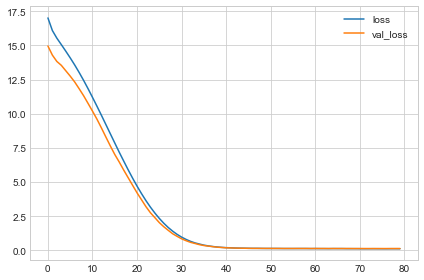

In [41]:
now1 = datetime.now()

model = keras.Sequential([
    
    layers.Dense(200,activation="relu",input_shape=[50]),
    layers.BatchNormalization(),
    layers.Dropout(1/5),
    
    layers.Dense(40,activation="relu"),
    layers.BatchNormalization(),
    layers.Dropout(1/10),
    
    layers.Dense(20,activation="relu"),
    layers.BatchNormalization(),
    
    layers.Dense(1)
])

model.compile(
    optimizer='adam',
    loss='MeanSquaredError',
    metrics=['MeanSquaredError'],
)

early_stopping = keras.callbacks.EarlyStopping(
    patience=10,
    min_delta=0.001,
    restore_best_weights=True,
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    batch_size=1323,
    epochs=100,
    callbacks=[early_stopping],
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print(color.BOLD +
      "\nMínima suma de los cuadrados de los errores: {}".format(history_df['val_loss'].min())+
      color.END)

now2 = datetime.now()
now2-now1

El modelo también empeora. Pruebo a reducir las neuronas de la segunda capa:

Epoch 1/100
9/9 [==============================] - 1s 24ms/step - loss: 17.3579 - mean_squared_error: 17.3579 - val_loss: 14.6617 - val_mean_squared_error: 14.6617
Epoch 2/100
9/9 [==============================] - 0s 14ms/step - loss: 16.2669 - mean_squared_error: 16.2669 - val_loss: 14.6891 - val_mean_squared_error: 14.6891
Epoch 3/100
9/9 [==============================] - 0s 12ms/step - loss: 15.7091 - mean_squared_error: 15.7091 - val_loss: 14.4932 - val_mean_squared_error: 14.4932
Epoch 4/100
9/9 [==============================] - 0s 10ms/step - loss: 15.2675 - mean_squared_error: 15.2675 - val_loss: 14.2004 - val_mean_squared_error: 14.2004
Epoch 5/100
9/9 [==============================] - 0s 12ms/step - loss: 14.8629 - mean_squared_error: 14.8629 - val_loss: 13.8920 - val_mean_squared_error: 13.8920
Epoch 6/100
9/9 [==============================] - 0s 12ms/step - loss: 14.4653 - mean_squared_error: 14.4653 - val_loss: 13.5829 - val_mean_squared_error: 13.5829
Epoch 7/100
9/9 

datetime.timedelta(seconds=10, microseconds=951539)

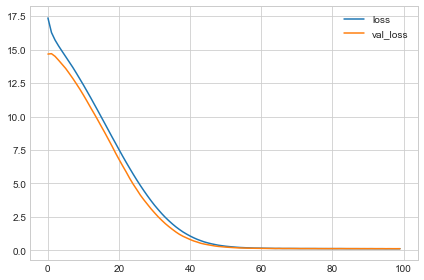

In [42]:
now1 = datetime.now()

model = keras.Sequential([
    
    layers.Dense(200,activation="relu",input_shape=[50]),
    layers.BatchNormalization(),
    layers.Dropout(1/5),
    
    layers.Dense(30,activation="relu"),
    layers.BatchNormalization(),
    layers.Dropout(1/10),
    
    layers.Dense(10,activation="relu"),
    layers.BatchNormalization(),
    
    layers.Dense(1)
])

model.compile(
    optimizer='adam',
    loss='MeanSquaredError',
    metrics=['MeanSquaredError'],
)

early_stopping = keras.callbacks.EarlyStopping(
    patience=10,
    min_delta=0.001,
    restore_best_weights=True,
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    batch_size=1323,
    epochs=100,
    callbacks=[early_stopping],
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print(color.BOLD +
      "\nMínima suma de los cuadrados de los errores: {}".format(history_df['val_loss'].min())+
      color.END)

now2 = datetime.now()
now2-now1

El modelo también empeora.

En consecuencia, concluyo que el mejor modelo es:

Epoch 1/100
9/9 [==============================] - 1s 24ms/step - loss: 16.9977 - mean_squared_error: 16.9977 - val_loss: 17.7893 - val_mean_squared_error: 17.7893
Epoch 2/100
9/9 [==============================] - 0s 13ms/step - loss: 16.2905 - mean_squared_error: 16.2905 - val_loss: 17.0914 - val_mean_squared_error: 17.0914
Epoch 3/100
9/9 [==============================] - 0s 11ms/step - loss: 15.8754 - mean_squared_error: 15.8754 - val_loss: 16.5877 - val_mean_squared_error: 16.5877
Epoch 4/100
9/9 [==============================] - 0s 12ms/step - loss: 15.5233 - mean_squared_error: 15.5233 - val_loss: 16.1065 - val_mean_squared_error: 16.1065
Epoch 5/100
9/9 [==============================] - 0s 10ms/step - loss: 15.1907 - mean_squared_error: 15.1907 - val_loss: 15.6037 - val_mean_squared_error: 15.6037
Epoch 6/100
9/9 [==============================] - 0s 10ms/step - loss: 14.8512 - mean_squared_error: 14.8512 - val_loss: 15.1219 - val_mean_squared_error: 15.1219
Epoch 7/100
9/9 

datetime.timedelta(seconds=10, microseconds=667144)

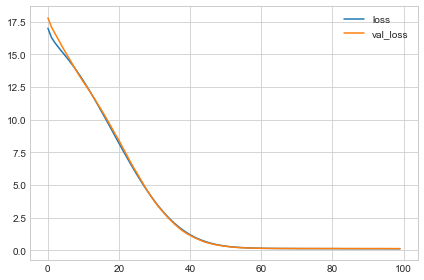

In [48]:
now1 = datetime.now()

model = keras.Sequential([
    
    layers.Dense(200,activation="relu",input_shape=[50]),
    layers.BatchNormalization(),
    layers.Dropout(1/5),
    
    layers.Dense(40,activation="relu"),
    layers.BatchNormalization(),
    layers.Dropout(1/10),
    
    layers.Dense(10,activation="relu"),
    layers.BatchNormalization(),
    
    layers.Dense(1)
])

model.compile(
    optimizer='adam',
    loss='MeanSquaredError',
    metrics=['MeanSquaredError'],
)

early_stopping = keras.callbacks.EarlyStopping(
    patience=10,
    min_delta=0.001,
    restore_best_weights=True,
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    batch_size=1323,
    epochs=100,
    callbacks=[early_stopping],
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print(color.BOLD +
      "\nMínima suma de los cuadrados de los errores: {}".format(history_df['val_loss'].min())+
      color.END)

now2 = datetime.now()
now2-now1

Ya que añadir o quitar neuronas a cualquiera de las tres capas empeora el modelo, concluyo que este modelo, con alta probabilidad, es óptimo, o cercano al óptimo.

## Entrenamiento final (con más epochs):

Hago un último entrenamiento del modelo final, esta vez con más epochs, para evaluar el modelo adecuadamente. El motivo por el que he empleado menos epochs en las ejecuciones anteriores ha sido reducir el tiempo de calculo.

Epoch 1/1000
9/9 [==============================] - 1s 26ms/step - loss: 17.3865 - mean_squared_error: 17.3865 - val_loss: 14.6550 - val_mean_squared_error: 14.6550
Epoch 2/1000
9/9 [==============================] - 0s 15ms/step - loss: 16.2903 - mean_squared_error: 16.2903 - val_loss: 14.3186 - val_mean_squared_error: 14.3186
Epoch 3/1000
9/9 [==============================] - 0s 12ms/step - loss: 15.7854 - mean_squared_error: 15.7854 - val_loss: 13.9508 - val_mean_squared_error: 13.9508
Epoch 4/1000
9/9 [==============================] - 0s 12ms/step - loss: 15.3968 - mean_squared_error: 15.3968 - val_loss: 13.6401 - val_mean_squared_error: 13.6401
Epoch 5/1000
9/9 [==============================] - 0s 12ms/step - loss: 15.0386 - mean_squared_error: 15.0386 - val_loss: 13.3659 - val_mean_squared_error: 13.3659
Epoch 6/1000
9/9 [==============================] - 0s 11ms/step - loss: 14.6709 - mean_squared_error: 14.6709 - val_loss: 13.0972 - val_mean_squared_error: 13.0972
Epoch 7/10

Epoch 102/1000
9/9 [==============================] - 0s 11ms/step - loss: 0.1235 - mean_squared_error: 0.1235 - val_loss: 0.1280 - val_mean_squared_error: 0.1280
Epoch 103/1000
9/9 [==============================] - 0s 11ms/step - loss: 0.1219 - mean_squared_error: 0.1219 - val_loss: 0.1277 - val_mean_squared_error: 0.1277
Epoch 104/1000
9/9 [==============================] - 0s 10ms/step - loss: 0.1188 - mean_squared_error: 0.1188 - val_loss: 0.1276 - val_mean_squared_error: 0.1276
Epoch 105/1000
9/9 [==============================] - 0s 12ms/step - loss: 0.1223 - mean_squared_error: 0.1223 - val_loss: 0.1300 - val_mean_squared_error: 0.1300
Epoch 106/1000
9/9 [==============================] - 0s 11ms/step - loss: 0.1228 - mean_squared_error: 0.1228 - val_loss: 0.1279 - val_mean_squared_error: 0.1279
Epoch 107/1000
9/9 [==============================] - 0s 10ms/step - loss: 0.1208 - mean_squared_error: 0.1208 - val_loss: 0.1272 - val_mean_squared_error: 0.1272
Epoch 108/1000
9/9 [==

9/9 [==============================] - 0s 12ms/step - loss: 0.0987 - mean_squared_error: 0.0987 - val_loss: 0.1175 - val_mean_squared_error: 0.1175
Epoch 203/1000
9/9 [==============================] - 0s 11ms/step - loss: 0.0973 - mean_squared_error: 0.0973 - val_loss: 0.1195 - val_mean_squared_error: 0.1195
Epoch 204/1000
9/9 [==============================] - 0s 10ms/step - loss: 0.1025 - mean_squared_error: 0.1025 - val_loss: 0.1187 - val_mean_squared_error: 0.1187
Epoch 205/1000
9/9 [==============================] - 0s 11ms/step - loss: 0.1001 - mean_squared_error: 0.1001 - val_loss: 0.1202 - val_mean_squared_error: 0.1202
Epoch 206/1000
9/9 [==============================] - 0s 11ms/step - loss: 0.0987 - mean_squared_error: 0.0987 - val_loss: 0.1190 - val_mean_squared_error: 0.1190
Epoch 207/1000
9/9 [==============================] - 0s 12ms/step - loss: 0.1000 - mean_squared_error: 0.1000 - val_loss: 0.1207 - val_mean_squared_error: 0.1207
Epoch 208/1000
9/9 [=================

datetime.timedelta(seconds=31, microseconds=79646)

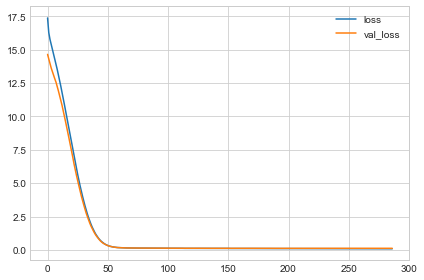

In [50]:
now1 = datetime.now()

model = keras.Sequential([
    
    layers.Dense(200,activation="relu",input_shape=[50]),
    layers.BatchNormalization(),
    layers.Dropout(1/5),
    
    layers.Dense(40,activation="relu"),
    layers.BatchNormalization(),
    layers.Dropout(1/10),
    
    layers.Dense(10,activation="relu"),
    layers.BatchNormalization(),
    
    layers.Dense(1)
])

model.compile(
    optimizer='adam',
    loss='MeanSquaredError',
    metrics=['MeanSquaredError'],
)

early_stopping = keras.callbacks.EarlyStopping(
    patience=100,
    min_delta=0.001,
    restore_best_weights=True,
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    batch_size=1323,
    epochs=1000,
    callbacks=[early_stopping],
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print(color.BOLD +
      "\nMínima suma de los cuadrados de los errores: {}".format(history_df['val_loss'].min())+
      color.END)

now2 = datetime.now()
now2-now1

Efectivamente, al entrenar el modelo con más epochs, el modelo mejora mucho más.

Empleo el modelo para predecir los resultados de las observaciones de train y de validación:

In [52]:
preds = model.predict(X_train)
predsv = model.predict(X_val)

Realizo un gráfico con las predicciones frente a los valores reales de la variable objetivo. La recta azul representa las predicciones perfectas:

C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


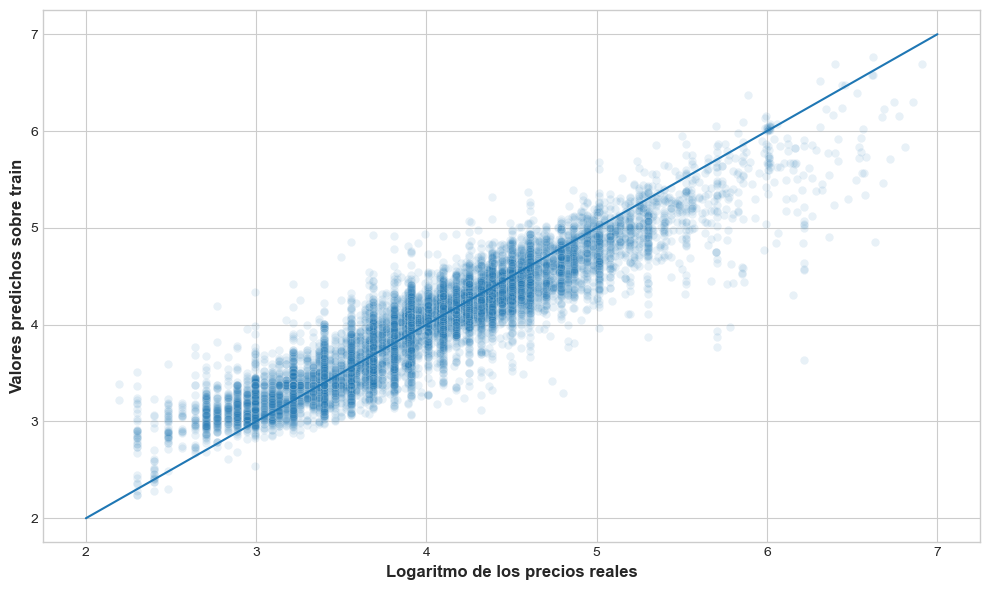

In [59]:
objetivo = list(list(np.array(y_train).reshape(1,-1))[0])

plt.figure(dpi=100, figsize=(10, 6))
sns.scatterplot(objetivo,list(preds.reshape(1,-1)[0]),alpha=0.1)
plt.plot((2, 7), (2, 7))

plt.xlabel('Logaritmo de los precios reales')
plt.ylabel('Valores predichos sobre train')
plt.show()

El motivo por el que los precios reales se acumulan en columnas es porque los precios tienden a ser números redondos, y por eso se acumulan de esta forma.

El gráfico anterior era sobre train, lo repito sobre validación:

C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


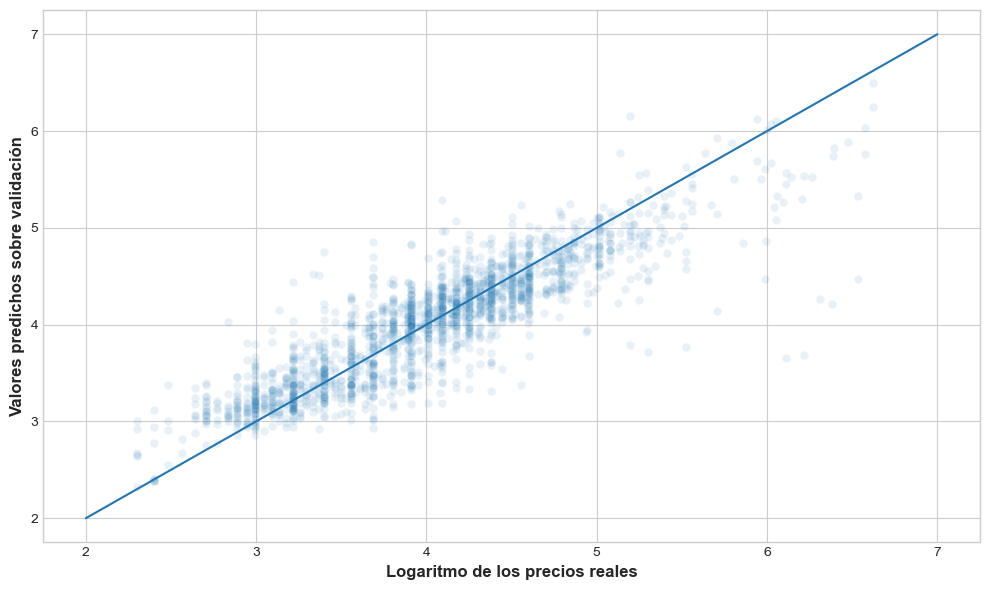

In [61]:
objetivo = list(list(np.array(y_val).reshape(1,-1))[0])

plt.figure(dpi=100, figsize=(10, 6))
sns.scatterplot(objetivo,list(predsv.reshape(1,-1)[0]),alpha=0.1)
plt.plot((2, 7), (2, 7))

plt.xlabel('Logaritmo de los precios reales')
plt.ylabel('Valores predichos sobre validación')
plt.show()

Error cuadrático medio sobre train:

In [57]:
sk.metrics.mean_squared_error(preds, y_train)

0.07733549681808079

Error cuadrático medio sobre el conjunto de validación:

In [58]:
sk.metrics.mean_squared_error(predsv, y_val)

0.11698482479306711